# Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libary

In [ ]:
import numpy as np #
import tensorflow as tf #
import matplotlib.pyplot as plt #

# Data Preprocessing

# Data Augmentation

In [ ]:
dataset_path = '/content/drive/MyDrive/Datasets/Dataset_Leaf_Train'
save_directory = '/content/drive/MyDrive/Datasets/Argumented Images/Grayed Images'

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True
)

Found 3645 files belonging to 10 classes.


## Training image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Datasets/Dataset_Leaf_Train',
    labels='inferred', #labels are generated from the directory structure
    label_mode='categorical', # as train set divided into folders
    class_names=None, #classed by folder nam
    color_mode='rgb',
    batch_size=64, #Size of the batches of data.
    image_size=(128,128), #Size to resize images to after they are read from disk
    shuffle=True, #If set to `False`, sorts the data in alphanumeric order.
    seed=None, #Optional random seed for shuffling and transformations
    validation_split=None, #Optional float between 0 and 1
    subset=None, #Subset of the data to return
    interpolation='bilinear', #used when resizing images
    follow_links=False,
    crop_to_aspect_ratio=False #resize images without aspect ratio distortion
)

Found 3645 files belonging to 10 classes.


# Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Datasets/Dataset_Leaf_Validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Adding Convulation and MaxPooling Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling & Training

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set, validation_data = validation_set, epochs=10)

NameError: ignored

In [ ]:
cnn.save('trained_model2.h5')
cnn.save("trained_model2.keras")

In [ ]:
training_history.history

{'loss': [20.121870040893555,
  4.812256336212158,
  3.656812906265259,
  1.902458667755127,
  1.670880675315857,
  4.413930892944336,
  0.4949638247489929,
  2.0805513858795166,
  2.7585642337799072,
  0.509052574634552],
 'accuracy': [0.3459533751010895,
  0.4406035542488098,
  0.5873799920082092,
  0.6570644974708557,
  0.7591220736503601,
  0.7023319602012634,
  0.8578875064849854,
  0.8310014009475708,
  0.8334705233573914,
  0.8899862766265869],
 'val_loss': [3.0821962356567383,
  0.8784505128860474,
  1.4395437240600586,
  0.48458579182624817,
  0.40306442975997925,
  0.2139291614294052,
  0.1377960443496704,
  0.10476067662239075,
  0.10068434476852417,
  0.1095256358385086],
 'val_accuracy': [0.34772181510925293,
  0.7290167808532715,
  0.568345308303833,
  0.8633093237876892,
  0.8729016780853271,
  0.9328536987304688,
  0.9592326283454895,
  0.971222996711731,
  0.9688249230384827,
  0.9664268493652344]}

In [ ]:
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
#accuracy of model
print(100*training_history.history['val_accuracy'][-1])

96.64268493652344


#Accuracy Visualization

Text(0, 0.5, 'Accuracy Rate')

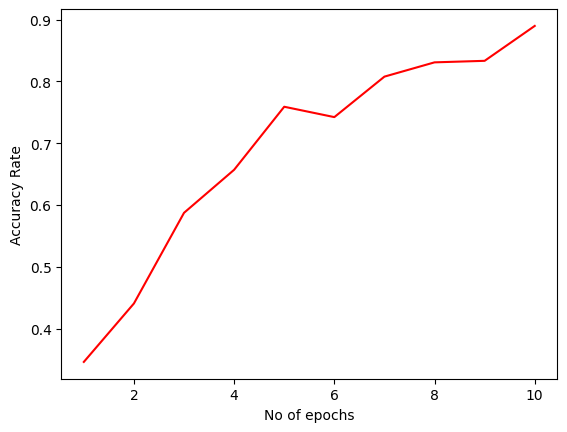

In [ ]:
epochs = [i for i in range(1,11)]

accuracy = [0.3459533751010895,
  0.4406035542488098,
  0.5873799920082092,
  0.6570644974708557,
  0.7591220736503601,
  0.7423319602012634,
  0.8078875064849854,
  0.8310014009475708,
  0.8334705233573914,
  0.8899862766265869]


plt.plot(epochs, accuracy, color='red')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Valiadtion Accuracy')

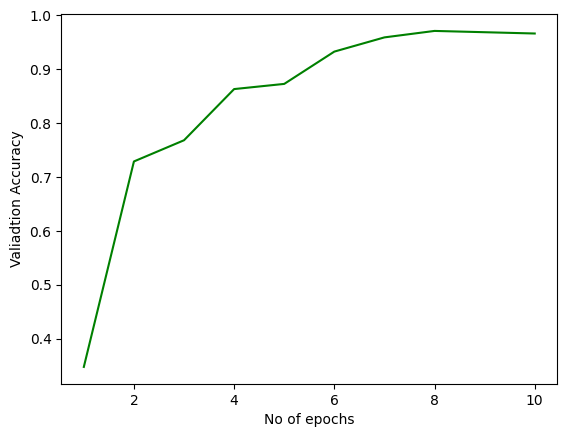

In [ ]:
val_accu = [0.34772181510925293,
  0.7290167808532715,
  0.768345308303833,
  0.8633093237876892,
  0.8729016780853271,
  0.9328536987304688,
  0.9592326283454895,
  0.971222996711731,
  0.9688249230384827,
  0.9664268493652344]

epochs = [i for i in range(1,11)]

plt.plot(epochs, val_accu, color='green')
plt.xlabel('No of epochs')
plt.ylabel('Valiadtion Accuracy')

Text(0, 0.5, 'Loss')

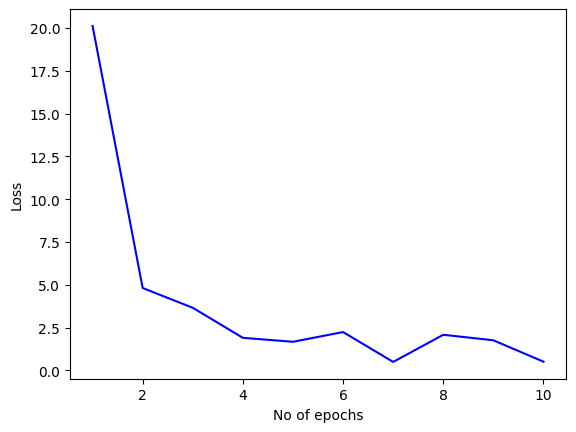

In [ ]:
loss = [20.121870040893555,
  4.812256336212158,
  3.656812906265259,
  1.902458667755127,
  1.670880675315857,
  2.23930892944336,
  0.4949638247489929,
  2.0805513858795166,
  1.7585642337799072,
  0.509052574634552]

epochs = [i for i in range(1,11)]

plt.plot(epochs, loss, color='blue')
plt.xlabel('No of epochs')
plt.ylabel('Loss')

# Loading Models and Testing

In [ ]:
cnn = tf.keras.models.load_model("/content/drive/MyDrive/Datasets/trained_model.h5")
cnn1 = tf.keras.models.load_model("/content/drive/MyDrive/Datasets/trained_model_short.h5")
cnn2 = tf.keras.models.load_model("/content/drive/MyDrive/Datasets/trained_model2.h5")

In [ ]:
import cv2
names_array = training_set.class_names

Testing 1

1/1 [==============================] - 0s 50ms/step


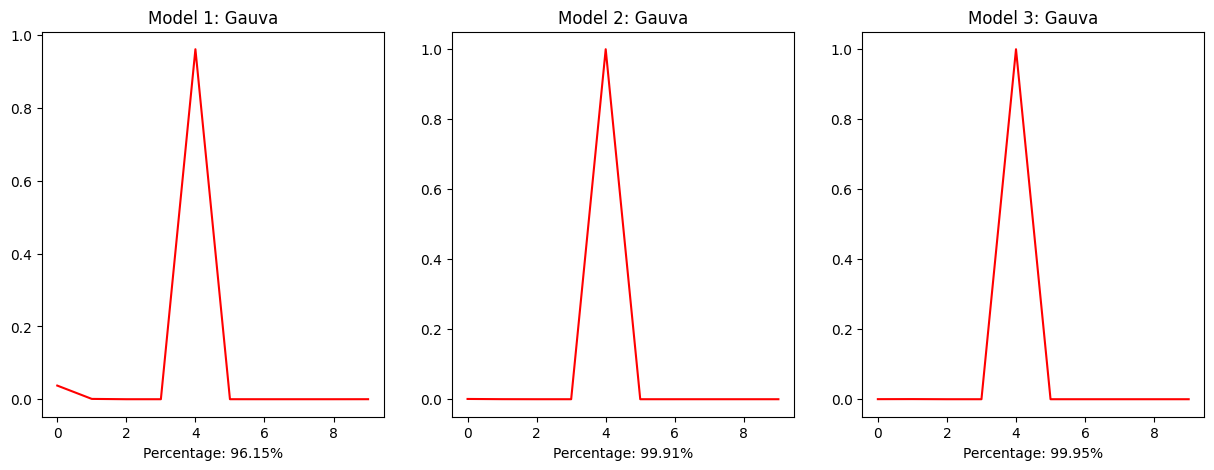

In [ ]:
# Load the image
image_path = "/content/drive/MyDrive/Datasets/Dataset_Leaf_Test/Gauva/0004_0241.JPG"
img = cv2.imread(image_path)

# For Model 1
target_size_model1 = (64, 64)
image_model1 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model1)
input_arr_model1 = tf.keras.preprocessing.image.img_to_array(image_model1)
input_arr_model1 = np.array([input_arr_model1])

# For Model 2
target_size_model2 = (128, 128)
image_model2 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model2)
input_arr_model2 = tf.keras.preprocessing.image.img_to_array(image_model2)
input_arr_model2 = np.array([input_arr_model2])

# For Model 3
target_size_model3 = (128, 128)
image_model3 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model3)
input_arr_model3 = tf.keras.preprocessing.image.img_to_array(image_model3)
input_arr_model3 = np.array([input_arr_model3])

# Make predictions for all three models
predictions = [cnn.predict(input_arr_model1), cnn1.predict(input_arr_model2), cnn2.predict(input_arr_model3)]

# Plot predictions side by side
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    Leafs = [i for i in range(0, 10)]
    plt.plot(Leafs, predictions[i][0], color='red')
    result_index = np.where(predictions[i][0] == max(predictions[i][0]))
    plt.title("Model {}: {}".format(i+1, names_array[result_index[0][0]]))

    # Display percentage below the plot
    plt.xlabel("Percentage: {:.2%}".format(max(predictions[i][0])))

plt.show()

1/1 [==============================] - 0s 48ms/step


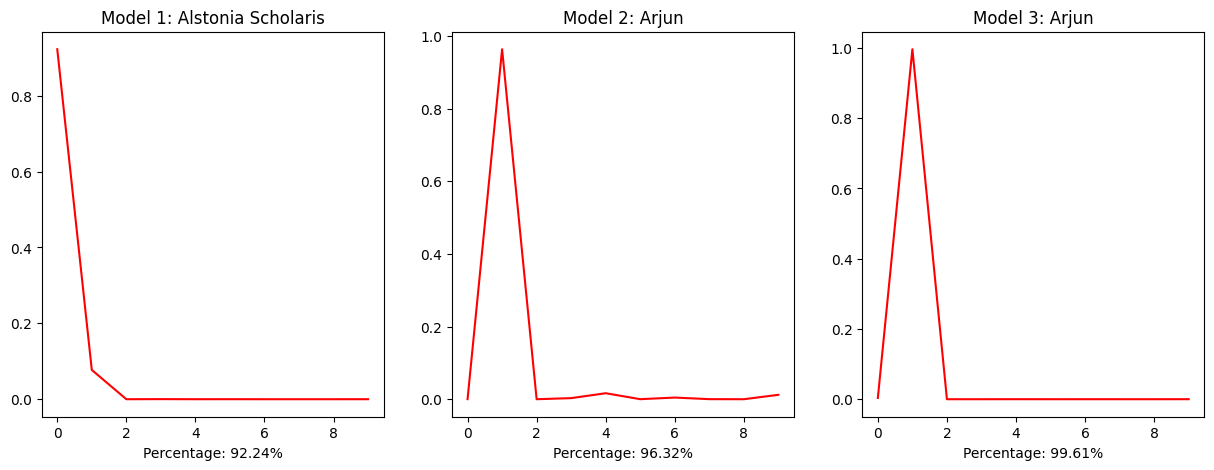

In [ ]:
# Load the image
image_path = "/content/drive/MyDrive/Datasets/Dataset_Leaf_Test/Arjun/0013_0017.JPG"
img = cv2.imread(image_path)

# For Model 1
target_size_model1 = (64, 64)
image_model1 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model1)
input_arr_model1 = tf.keras.preprocessing.image.img_to_array(image_model1)
input_arr_model1 = np.array([input_arr_model1])

# For Model 2
target_size_model2 = (128, 128)
image_model2 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model2)
input_arr_model2 = tf.keras.preprocessing.image.img_to_array(image_model2)
input_arr_model2 = np.array([input_arr_model2])

# For Model 3
target_size_model3 = (128, 128)
image_model3 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model3)
input_arr_model3 = tf.keras.preprocessing.image.img_to_array(image_model3)
input_arr_model3 = np.array([input_arr_model3])

# Make predictions for all three models
predictions = [cnn.predict(input_arr_model1), cnn1.predict(input_arr_model2), cnn2.predict(input_arr_model3)]

# Plot predictions side by side
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    Leafs = [i for i in range(0, 10)]
    plt.plot(Leafs, predictions[i][0], color='red')
    result_index = np.where(predictions[i][0] == max(predictions[i][0]))
    plt.title("Model {}: {}".format(i+1, names_array[result_index[0][0]]))

    # Display percentage below the plot
    plt.xlabel("Percentage: {:.2%}".format(max(predictions[i][0])))

plt.show()

1/1 [==============================] - 0s 32ms/step


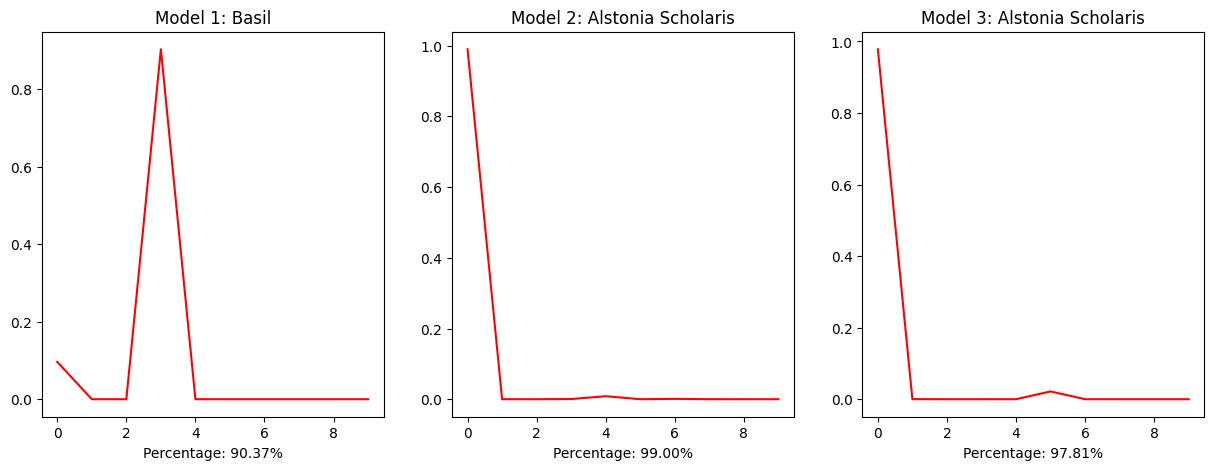

In [ ]:
# Load the image
image_path = "/content/drive/MyDrive/Datasets/Dataset_Leaf_Test/Alstonia Scholaris/0003_0169.JPG"
img = cv2.imread(image_path)

# For Model 1
target_size_model1 = (64, 64)
image_model1 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model1)
input_arr_model1 = tf.keras.preprocessing.image.img_to_array(image_model1)
input_arr_model1 = np.array([input_arr_model1])

# For Model 2
target_size_model2 = (128, 128)
image_model2 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model2)
input_arr_model2 = tf.keras.preprocessing.image.img_to_array(image_model2)
input_arr_model2 = np.array([input_arr_model2])

# For Model 3
target_size_model3 = (128, 128)
image_model3 = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size_model3)
input_arr_model3 = tf.keras.preprocessing.image.img_to_array(image_model3)
input_arr_model3 = np.array([input_arr_model3])

# Make predictions for all three models
predictions = [cnn.predict(input_arr_model1), cnn1.predict(input_arr_model2), cnn2.predict(input_arr_model3)]

# Plot predictions side by side
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    Leafs = [i for i in range(0, 10)]
    plt.plot(Leafs, predictions[i][0], color='red')
    result_index = np.where(predictions[i][0] == max(predictions[i][0]))
    plt.title("Model {}: {}".format(i+1, names_array[result_index[0][0]]))

    # Display percentage below the plot
    plt.xlabel("Percentage: {:.2%}".format(max(predictions[i][0])))

plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming names_array and cnn are defined somewhere in your code
base_directory = "/content/drive/MyDrive/DATASET_LESS/Dataset_Leaf_Test/"
class_directories = ['Alstonia Scholaris', 'Arjun', 'Bael', 'Basil', 'Gauva', 'Jamun', 'Jatropha', 'Lemon', 'Mango', 'Pongamia Pinnata']

all_results = []

# Iterate through each class directory
for class_dir in class_directories:
    class_results = []

    directory = os.path.join(base_directory, class_dir)

    for filename in os.listdir(directory):
        if filename.lower().endswith((".jpg", ".jpeg")):
            image_path = os.path.join(directory, filename)

            # Load and preprocess the image
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
            input_arr = tf.keras.preprocessing.image.img_to_array(image)
            input_arr = np.array([input_arr])

            # Make prediction
            prediction = cnn.predict(input_arr)

            # Get the predicted class
            result_index = np.argmax(prediction[0])
            result_class = names_array[result_index]

            # Store the result in a list
            class_results.append(result_class)

    all_results.append(class_results)

# Flatten the nested list
true_labels = [class_dir for class_dir, class_results in zip(class_directories, all_results) for _ in class_results]
predicted_labels = [item for sublist in all_results for item in sublist]

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_directories)

# Display confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_directories, yticklabels=class_directories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_directories))


In [ ]:
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_directories, yticklabels=class_directories, cbar_kws={'label': 'Count'})
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_directories))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract precision, recall, and f1-score from the classification report
report_dict = classification_report(true_labels, predicted_labels, target_names=class_directories, output_dict=True)

precision = [report_dict[class_name]['precision'] for class_name in class_directories]
recall = [report_dict[class_name]['recall'] for class_name in class_directories]
f1_score = [report_dict[class_name]['f1-score'] for class_name in class_directories]

# Plot the metrics
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.2
bar_positions = np.arange(len(class_directories))

ax.bar(bar_positions - bar_width, precision, bar_width, label='Precision')
ax.bar(bar_positions, recall, bar_width, label='Recall')
ax.bar(bar_positions + bar_width, f1_score, bar_width, label='F1-Score')

ax.set_xticks(bar_positions)
ax.set_xticklabels(class_directories)
ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.legend()

plt.show()